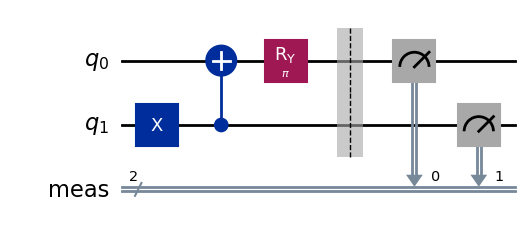

In [64]:
from qiskit.circuit import QuantumCircuit
import numpy as np

qc = QuantumCircuit(2)
qc.x(1)
qc.cx(1, 0)
qc.ry(np.pi, 0)

qc.measure_all()

qc.draw(output="mpl")

<IPython.core.display.Latex object>

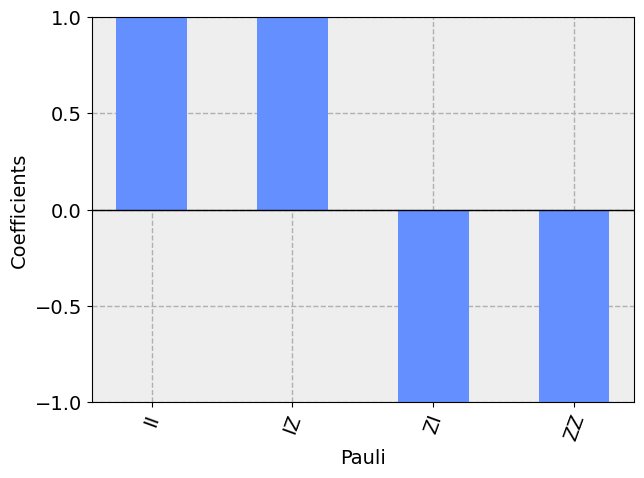

In [61]:
from qiskit.quantum_info import Statevector

# notice: statevector is reversed
sv = Statevector(qc)
display(sv.draw("latex"))
display(sv.draw("paulivec"))

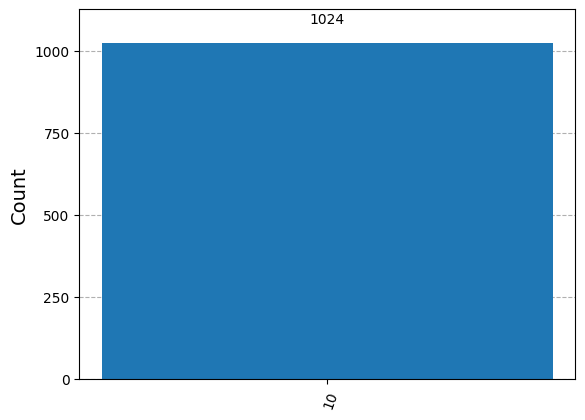

In [65]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [43]:
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.quantum_info import SparsePauliOp

h0 = SparsePauliOp(["ZI"])
h1 = SparsePauliOp(["IZ"])
estimator = Estimator()
job = estimator.run(
    [
        (qc, h0),
        (qc, h1),
    ]
)
for i, result in enumerate(job.result()):
    data = result.data
    evs = data.evs
    stds = data.stds
    print(f"Expectation value for h{i}: {evs:.2f} ± {stds:.2f}")

Expectation value for h0: -1.00 ± 0.00
Expectation value for h1: 1.00 ± 0.00


In [30]:
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.quantum_info import SparsePauliOp

h = SparsePauliOp(["ZZ"])
estimator = Estimator()
job = estimator.run(
    [(qc, h)],
)
result = job.result()[0]
data = result.data
evs = data.evs
stds = data.stds
print(f"Expectation value for h: {evs:.2f} ± {stds}")

Expectation value for h: -1.00 ± 0.0


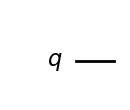

In [22]:
from qiskit.circuit import QuantumCircuit

qc = QuantumCircuit(1)
# qc.x(0)

qc.draw(output="mpl")

In [23]:
from qiskit.quantum_info import Statevector

sv = Statevector(qc)
sv.draw("latex")

<IPython.core.display.Latex object>

In [24]:
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import ZGate

z = ZGate().to_matrix()
# h = SparsePauliOp.from_operator(z)
# h = SparsePauliOp(["Z"])
# h = SparsePauliOp.from_sparse_list([("Z", [0], 1)], num_qubits=1) # ("Z", [0], 1) -> ("Paulis", [indices], coefficient)
h = SparsePauliOp.from_list([("Z", 1)])  # ("Z", 1) -> ("Paulis", coefficient)
print(h)
estimator = Estimator()
job = estimator.run([(qc, h)])
result = job.result()[0]
data = result.data
evs = data.evs
stds = data.stds
print(f"Expectation value for h: {evs:.2f} ± {stds:.2f}")

SparsePauliOp(['Z'],
              coeffs=[1.+0.j])
Expectation value for h: 1.00 ± 0.00


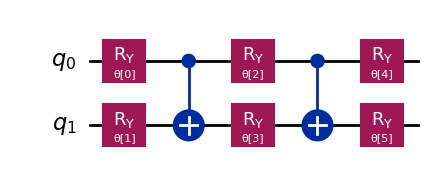

Expectation value for H0: 1.55 ± 0.00
Expectation value for H1: -1.07 ± 0.00


In [25]:
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import SparsePauliOp

psi = RealAmplitudes(num_qubits=2, reps=2)

display(psi.decompose().draw("mpl"))

H0 = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])
H1 = SparsePauliOp.from_list([("ZI", 1), ("ZZ", 1)])

# print(psi.num_parameters) # 6
theta0 = [0, 1, 1, 2, 3, 5]
theta1 = [1, 2, 3, 4, 5, 6]

estimator = Estimator()

# <psi(theta0)|H0|psi(theta0)>
# <psi(theta1)|H1|psi(theta1)>
job = estimator.run([(psi, [H0, H1], [theta0, theta1])], precision=0.01)
result = job.result()[0]
data = result.data
evs = data.evs
stds = data.stds
for i, (ev, std) in enumerate(zip(evs, stds)):
    print(f"Expectation value for H{i}: {ev:.2f} ± {std:.2f}")

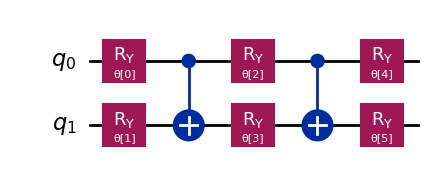

Expectation value for H0: 1.55 ± 0.00
Expectation value for H1: -1.09 ± 0.00


In [26]:
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import SparsePauliOp

psi = RealAmplitudes(num_qubits=2, reps=2)

display(psi.decompose().draw("mpl"))

H0 = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])
H1 = SparsePauliOp.from_list([("ZI", 1), ("ZZ", 1)])

# print(psi.num_parameters) # 6
theta0 = [0, 1, 1, 2, 3, 5]
theta1 = [1, 2, 3, 4, 5, 6]

estimator = Estimator()

# <psi(theta0)|H0|psi(theta0)>
# <psi(theta1)|H1|psi(theta1)>
job = estimator.run([(psi, H0, theta0), (psi, H1, theta1)], precision=0.01)
for i, result in enumerate(job.result()):
    data = result.data
    evs = data.evs
    stds = data.stds
    print(f"Expectation value for H{i}: {evs:.2f} ± {stds:.2f}")